In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the file
dataset = pd.read_csv('Social_Network_Ads.csv')

# ignore user id, Gender just for now
X = dataset.iloc[:,[2,3]].values 
y = dataset.iloc[:,4]

In [3]:
# Splitting data set into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=10)

# Feature scaling
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Fitting  DecisionTree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.87      0.90        69
          1       0.74      0.84      0.79        31

avg / total       0.87      0.86      0.86       100



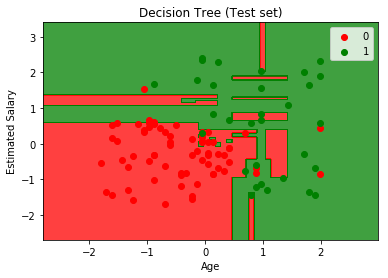

In [5]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [6]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(X), n_folds = 10, random_state=0)

X_fold = dataset.iloc[:,[2,3]] 
y_fold = dataset.iloc[:,4]

fold_accuracy = []

for train_fold, valid_fold in cv:
    train = X_fold.loc[train_fold]
    valid = X_fold.loc[valid_fold]
    
    train_y = y_fold.loc[train_fold]
    valid_y = y_fold.loc[valid_fold]
    
    model = classifier.fit(X = train, y = train_y)
    valid_acc = model.score(X = train, y = train_y)
    fold_accuracy.append(valid_acc)
    
print("Accuracy per fold: ", fold_accuracy, "\n")
print("Avg. accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.9944444444444445, 0.9972222222222222, 0.9972222222222222, 0.9944444444444445, 0.9972222222222222, 0.9972222222222222, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445] 

Avg. accuracy:  0.9955555555555555


C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# First stratified K Fold
from sklearn.cross_validation import cross_val_score
score = cross_val_score(estimator = classifier, X=X, y=y, scoring="accuracy", cv=15)
print("Accuracy: ")
print(score)
print("Avg. Accuracy: ", score.mean())

# Logistic regression vs Decision Tree
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
cl = cross_val_score(estimator=log, X=X, y=y, scoring="accuracy", cv=15)
print("\nLogistic regression vs Decision Tree")
print(cl.mean())

Accuracy: 
[0.82142857 0.82142857 0.92592593 0.85185185 0.92592593 0.81481481
 0.96296296 0.81481481 0.76923077 0.88461538 0.65384615 0.84615385
 0.73076923 0.88461538 0.80769231]
Avg. Accuracy:  0.8344051010717677

Logistic regression vs Decision Tree
0.645075295075295
